/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.007139056594825471
Cluster 0: http, com, twitpic, tinyurl, ly, plurk, bit, www, yfrog, like
Cluster 1: just, good, work, love, know, like, got, going, lol, oh
Cluster 2: day, happy, mothers, mother, good, mom, today, great, love, birthday


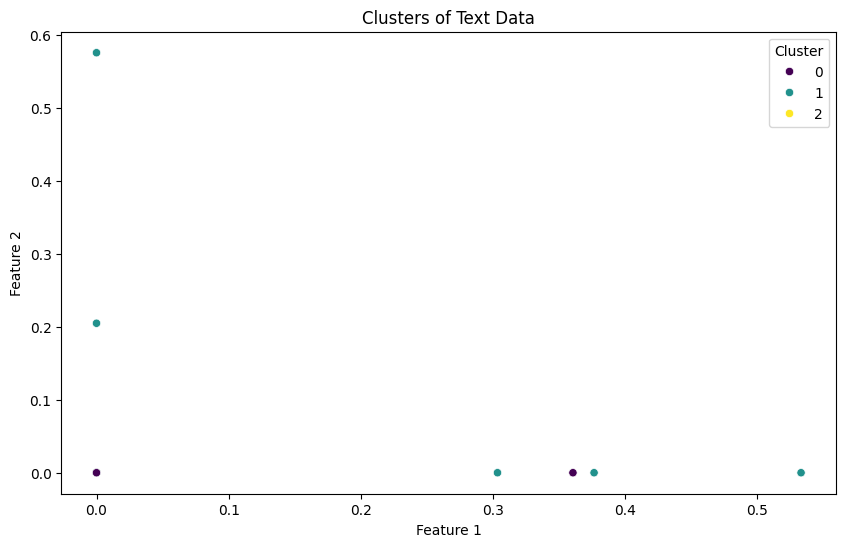

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assumed to have a 'text' column for the reviews)
df = pd.read_csv('sentiment_dataset.csv', encoding='ISO-8859-1')  # Adjust encoding as necessary

# Preprocess the data
df['text'] = df['text'].fillna('')  # Replace NaN with an empty string
texts = df['text'].astype(str).values  # Ensure all entries are strings

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

# Define number of clusters
num_clusters = 3  # You can experiment with different numbers of clusters

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['cluster'] = labels

# Evaluate clustering
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Analyze the clusters
def print_top_words_per_cluster(model, feature_names, n_words=10):
    for i, cluster_center in enumerate(model.cluster_centers_):
        top_indices = cluster_center.argsort()[-n_words:][::-1]
        top_words = [feature_names[index] for index in top_indices]
        print(f"Cluster {i}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
print_top_words_per_cluster(kmeans, feature_names)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0].toarray().flatten(), y=X[:, 1].toarray().flatten(), hue=labels, palette='viridis')
plt.title('Clusters of Text Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()
